In [ ]:
# 获取矩阵每一项的倒数所组成的矩阵
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import copy
import matplotlib.pyplot as plt

matIDList = np.load("/home/wngys/lab/DeepFold/protein_infor/IDArray.npy", allow_pickle=True).tolist()

dir_path1 = "/home/wngys/lab/DeepFold/distance_matrix/distance_matrix_mine/"
dir_path2 = "/home/wngys/lab/DeepFold/distance_matrix_r/distance_matrix_mine_r/"

cnt = 0
for mat_id in matIDList:
    dist_mat_path1 = dir_path1 + mat_id + ".npy"
    dist_mat_path2 = dir_path2 + mat_id + ".npy"

    dist_mat1 = np.load(dist_mat_path1, allow_pickle=True)
    dist_mat2 = 1.0 / dist_mat1

    k = 1.2
    inf_position = np.isinf(dist_mat2)
    dist_mat2_temp = copy.deepcopy(dist_mat2)
    dist_mat2_temp[inf_position] = 0
    dist_mat2[inf_position] = np.max(dist_mat2_temp) * k

    print(mat_id)

    plt.matshow(dist_mat1)
    plt.show()

    plt.matshow(dist_mat2)
    plt.show()

    cnt += 1
    if cnt > 50:
        break
    
    # np.save(dist_mat_path2, dist_mat2)

In [2]:
# 测试：加载举例矩阵
import numpy as np

M_2 = np.load("/home/wngys/lab/DeepFold/distance_matrix/distance_matrix_mine/d1a6bb_.npy", allow_pickle=True)
print(M_2.shape)
print(M_2)

(40, 40)
[[ 0.          3.82500157  5.87353386 ... 38.69357458 42.46633529
  42.95800577]
 [ 3.82500157  0.          3.83356296 ... 35.65458401 39.44925961
  40.16219706]
 [ 5.87353386  3.83356296  0.         ... 35.4358666  39.16516923
  39.82646723]
 ...
 [38.69357458 35.65458401 35.4358666  ...  0.          3.83374243
   6.0187389 ]
 [42.46633529 39.44925961 39.16516923 ...  3.83374243  0.
   3.84340019]
 [42.95800577 40.16219706 39.82646723 ...  6.0187389   3.84340019
   0.        ]]


In [3]:
M_3 = np.load("/home/wngys/lab/DeepFold/distance_matrix_r/distance_matrix_mine_r/d1a6bb_.npy", allow_pickle=True)
print(M_3.shape)
print(M_3)

(40, 40)
[[0.31581921 0.2614378  0.17025525 ... 0.02584408 0.02354806 0.02327855]
 [0.2614378  0.31581921 0.26085394 ... 0.02804688 0.02534902 0.02489904]
 [0.17025525 0.26085394 0.31581921 ... 0.02822    0.02553289 0.02510893]
 ...
 [0.02584408 0.02804688 0.02822    ... 0.31581921 0.26084173 0.16614776]
 [0.02354806 0.02534902 0.02553289 ... 0.26084173 0.31581921 0.26018628]
 [0.02327855 0.02489904 0.02510893 ... 0.16614776 0.26018628 0.31581921]]


In [7]:
import torch
import torch.nn as nn
M3 = torch.from_numpy(M_3)
M3 = M3.unsqueeze(0)
print(M3.shape)
tfm = nn.LayerNorm((1, 40, 40))
M3 = M3.to(torch.float32)
print(tfm(M3))

torch.Size([1, 40, 40])
tensor([[[ 3.3306,  2.5213,  1.1644,  ..., -0.9847, -1.0189, -1.0229],
         [ 2.5213,  3.3306,  2.5126,  ..., -0.9520, -0.9921, -0.9988],
         [ 1.1644,  2.5126,  3.3306,  ..., -0.9494, -0.9894, -0.9957],
         ...,
         [-0.9847, -0.9520, -0.9494,  ...,  3.3306,  2.5125,  1.1032],
         [-1.0189, -0.9921, -0.9894,  ...,  2.5125,  3.3306,  2.5027],
         [-1.0229, -0.9988, -0.9957,  ...,  1.1032,  2.5027,  3.3306]]],
       grad_fn=<NativeLayerNormBackward0>)


In [9]:
M4 = torch.from_numpy(M_4)
M4 = M4.unsqueeze(0)
print(M4.shape)
tfm = nn.LayerNorm((1, 40, 40))
M4 = M4.to(torch.float32)
print(tfm(M4))

torch.Size([1, 40, 40])
tensor([[[ 4.1226,  2.6311,  0.7609,  ..., -0.5846, -0.5900, -0.5906],
         [ 2.6311,  4.1226,  2.6166,  ..., -0.5789, -0.5858, -0.5869],
         [ 0.7609,  2.6166,  4.1226,  ..., -0.5785, -0.5853, -0.5864],
         ...,
         [-0.5846, -0.5789, -0.5785,  ...,  4.1226,  2.6163,  0.6952],
         [-0.5900, -0.5858, -0.5853,  ...,  2.6163,  4.1226,  2.6001],
         [-0.5906, -0.5869, -0.5864,  ...,  0.6952,  2.6001,  4.1226]]],
       grad_fn=<NativeLayerNormBackward0>)


In [1]:
# K = 3
import warnings
warnings.filterwarnings('ignore')
import numpy as np

matIDList = np.load("/home/wngys/lab/DeepFold/protein_infor/IDArray.npy", allow_pickle=True).tolist()

dir_path1 = "/home/wngys/lab/DeepFold/distance_matrix_r/distance_matrix_mine_r/"
dir_path2 = "/home/wngys/lab/DeepFold/distance_matrix_r/distance_matrix_mine_r_3/"

for mat_id in matIDList:
    dist_mat_path1 = dir_path1 + mat_id + ".npy"
    dist_mat_path2 = dir_path2 + mat_id + ".npy"

    dist_mat1 = np.load(dist_mat_path1, allow_pickle=True)

    dist_mat1_2 = np.power(dist_mat1, 2)
    dist_mat1_4 = np.power(dist_mat1, 4)
    dist_mat1_6 = np.power(dist_mat1, 6)

    dist_mat2 = np.array([dist_mat1_2, dist_mat1_4, dist_mat1_6])
    
    np.save(dist_mat_path2, dist_mat2)

In [2]:
dist_mat1 = np.load("/home/wngys/lab/DeepFold/distance_matrix_r/distance_matrix_mine_r/d2pn2a1.npy", allow_pickle=True)
print(dist_mat1)

[[0.39941219 0.26029498 0.15251294 ... 0.02737282 0.02699221 0.02523399]
 [0.26029498 0.39941219 0.25964577 ... 0.02858361 0.02802156 0.02623472]
 [0.15251294 0.25964577 0.39941219 ... 0.03189105 0.03126016 0.02911989]
 ...
 [0.02737282 0.02858361 0.03189105 ... 0.39941219 0.25915944 0.15151004]
 [0.02699221 0.02802156 0.03126016 ... 0.25915944 0.39941219 0.25900582]
 [0.02523399 0.02623472 0.02911989 ... 0.15151004 0.25900582 0.39941219]]


In [3]:
dist_mat1_2 = np.power(dist_mat1, 2)
print(dist_mat1_2)

[[0.1595301  0.06775348 0.0232602  ... 0.00074927 0.00072858 0.00063675]
 [0.06775348 0.1595301  0.06741593 ... 0.00081702 0.00078521 0.00068826]
 [0.0232602  0.06741593 0.1595301  ... 0.00101704 0.0009772  0.00084797]
 ...
 [0.00074927 0.00081702 0.00101704 ... 0.1595301  0.06716361 0.02295529]
 [0.00072858 0.00078521 0.0009772  ... 0.06716361 0.1595301  0.06708401]
 [0.00063675 0.00068826 0.00084797 ... 0.02295529 0.06708401 0.1595301 ]]


In [4]:
dist_mat1_4 = np.power(dist_mat1, 4)
print(dist_mat1_4)

[[2.54498513e-02 4.59053373e-03 5.41036797e-04 ... 5.61407594e-07
  5.30828080e-07 4.05456133e-07]
 [4.59053373e-03 2.54498513e-02 4.54490725e-03 ... 6.67525941e-07
  6.16551153e-07 4.73702812e-07]
 [5.41036797e-04 4.54490725e-03 2.54498513e-02 ... 1.03436849e-06
  9.54915019e-07 7.19050133e-07]
 ...
 [5.61407594e-07 6.67525941e-07 1.03436849e-06 ... 2.54498513e-02
  4.51095114e-03 5.26945446e-04]
 [5.30828080e-07 6.16551153e-07 9.54915019e-07 ... 4.51095114e-03
  2.54498513e-02 4.50026496e-03]
 [4.05456133e-07 4.73702812e-07 7.19050133e-07 ... 5.26945446e-04
  4.50026496e-03 2.54498513e-02]]


In [5]:
dist_mat1_6 = np.power(dist_mat1, 6)
print(dist_mat1_6)

[[4.06001720e-03 3.11024624e-04 1.25846228e-05 ... 4.20646640e-10
  3.86750454e-10 2.58175966e-10]
 [3.11024624e-04 4.06001720e-03 3.06399137e-04 ... 5.45383784e-10
  4.84120721e-10 3.26031036e-10]
 [1.25846228e-05 3.06399137e-04 4.06001720e-03 ... 1.05199318e-09
  9.33140601e-10 6.09731675e-10]
 ...
 [4.20646640e-10 5.45383784e-10 1.05199318e-09 ... 4.06001720e-03
  3.02971785e-04 1.20961868e-05]
 [3.86750454e-10 4.84120721e-10 9.33140601e-10 ... 3.02971785e-04
  4.06001720e-03 3.01895839e-04]
 [2.58175966e-10 3.26031036e-10 6.09731675e-10 ... 1.20961868e-05
  3.01895839e-04 4.06001720e-03]]


In [6]:
dist_mat2 = np.load("/home/wngys/lab/DeepFold/distance_matrix_r/distance_matrix_mine_r_3/d2pn2a1.npy", allow_pickle=True)
print(dist_mat2.shape)

(3, 132, 132)


In [7]:
print(dist_mat2[0])

[[0.1595301  0.06775348 0.0232602  ... 0.00074927 0.00072858 0.00063675]
 [0.06775348 0.1595301  0.06741593 ... 0.00081702 0.00078521 0.00068826]
 [0.0232602  0.06741593 0.1595301  ... 0.00101704 0.0009772  0.00084797]
 ...
 [0.00074927 0.00081702 0.00101704 ... 0.1595301  0.06716361 0.02295529]
 [0.00072858 0.00078521 0.0009772  ... 0.06716361 0.1595301  0.06708401]
 [0.00063675 0.00068826 0.00084797 ... 0.02295529 0.06708401 0.1595301 ]]


In [8]:
print(dist_mat2[1])

[[2.54498513e-02 4.59053373e-03 5.41036797e-04 ... 5.61407594e-07
  5.30828080e-07 4.05456133e-07]
 [4.59053373e-03 2.54498513e-02 4.54490725e-03 ... 6.67525941e-07
  6.16551153e-07 4.73702812e-07]
 [5.41036797e-04 4.54490725e-03 2.54498513e-02 ... 1.03436849e-06
  9.54915019e-07 7.19050133e-07]
 ...
 [5.61407594e-07 6.67525941e-07 1.03436849e-06 ... 2.54498513e-02
  4.51095114e-03 5.26945446e-04]
 [5.30828080e-07 6.16551153e-07 9.54915019e-07 ... 4.51095114e-03
  2.54498513e-02 4.50026496e-03]
 [4.05456133e-07 4.73702812e-07 7.19050133e-07 ... 5.26945446e-04
  4.50026496e-03 2.54498513e-02]]


In [9]:
print(dist_mat2[2])

[[4.06001720e-03 3.11024624e-04 1.25846228e-05 ... 4.20646640e-10
  3.86750454e-10 2.58175966e-10]
 [3.11024624e-04 4.06001720e-03 3.06399137e-04 ... 5.45383784e-10
  4.84120721e-10 3.26031036e-10]
 [1.25846228e-05 3.06399137e-04 4.06001720e-03 ... 1.05199318e-09
  9.33140601e-10 6.09731675e-10]
 ...
 [4.20646640e-10 5.45383784e-10 1.05199318e-09 ... 4.06001720e-03
  3.02971785e-04 1.20961868e-05]
 [3.86750454e-10 4.84120721e-10 9.33140601e-10 ... 3.02971785e-04
  4.06001720e-03 3.01895839e-04]
 [2.58175966e-10 3.26031036e-10 6.09731675e-10 ... 1.20961868e-05
  3.01895839e-04 4.06001720e-03]]


d5azpa_


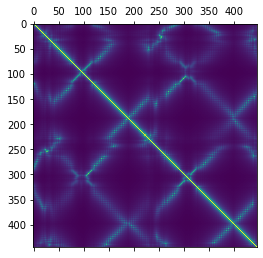

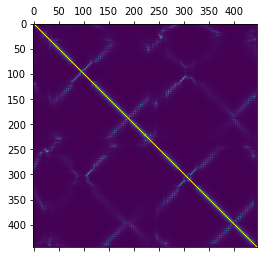

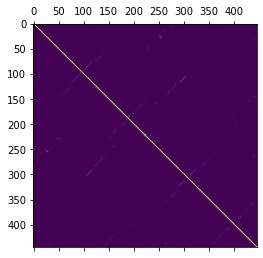

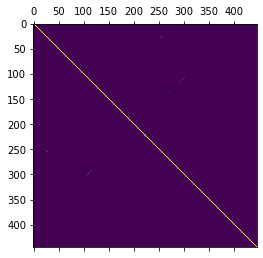

d1xrsa_


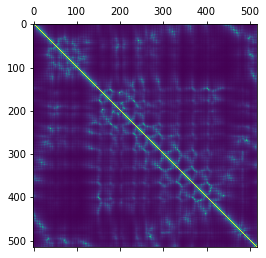

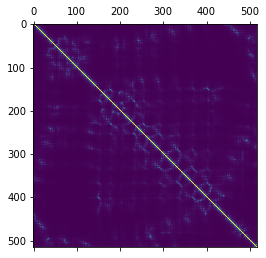

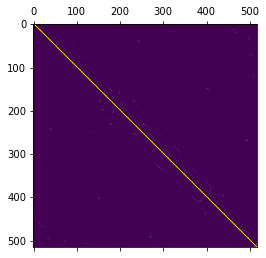

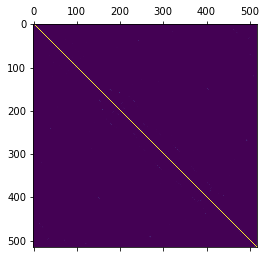

d1u8sa2


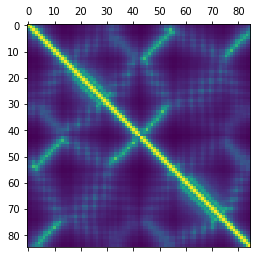

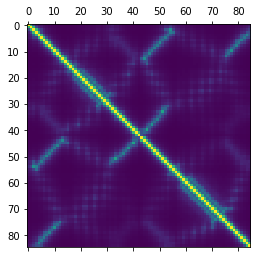

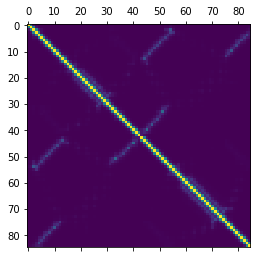

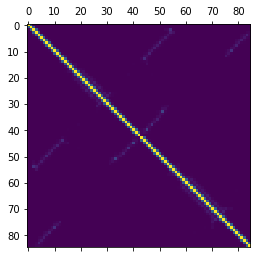

d1f81a_


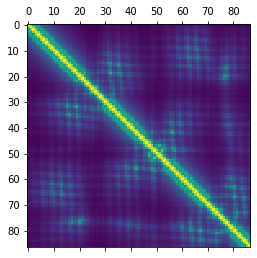

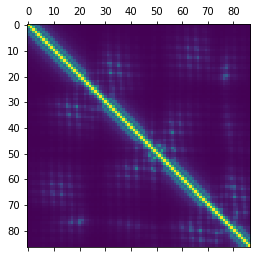

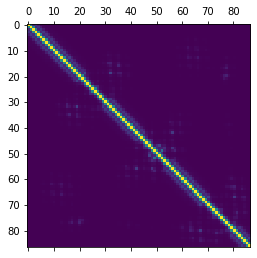

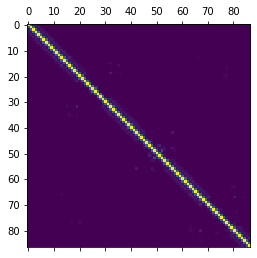

d3lhla_


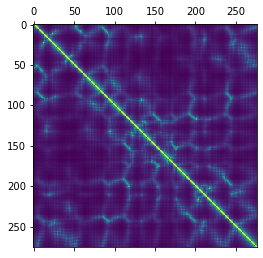

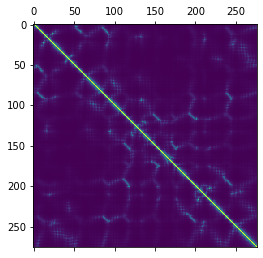

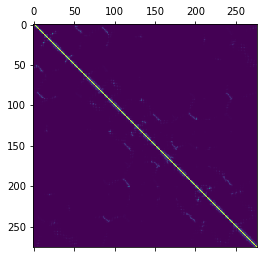

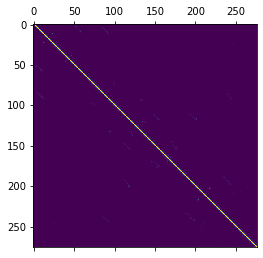

d1vcaa2


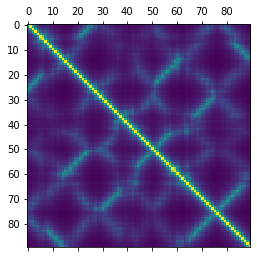

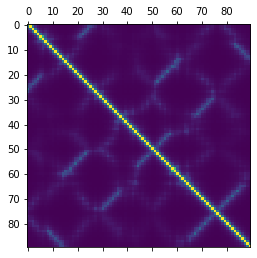

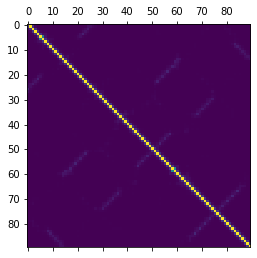

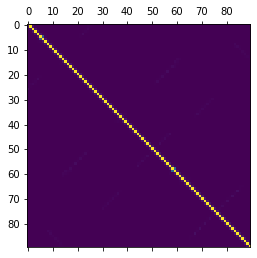

d2cpha1


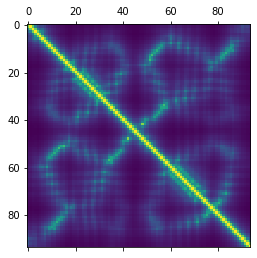

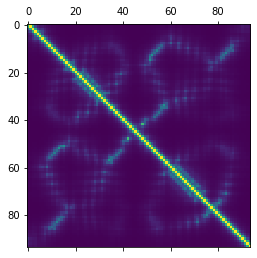

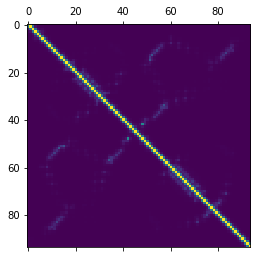

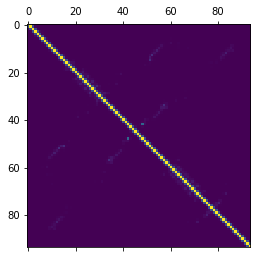

d1vaja1


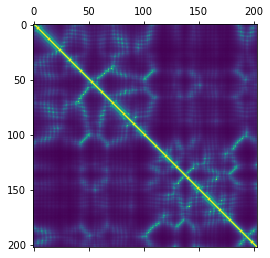

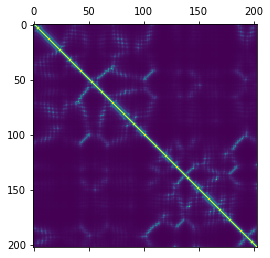

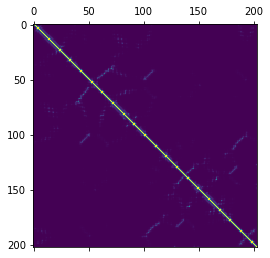

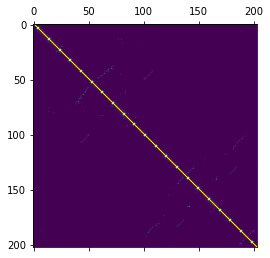

d2q9qb2


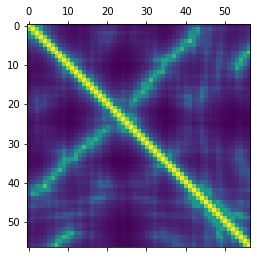

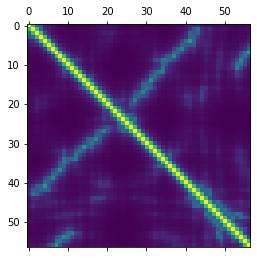

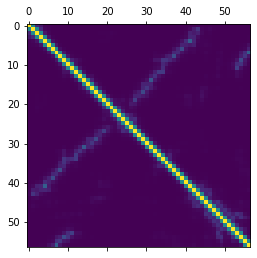

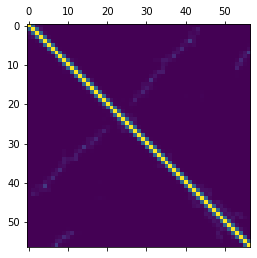

d1uzka1


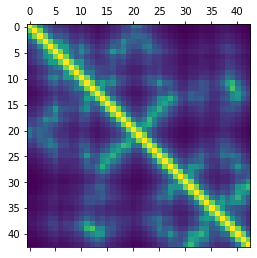

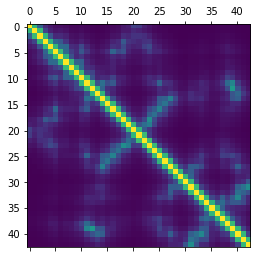

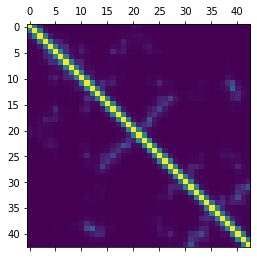

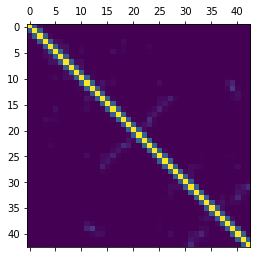

d1ngka_


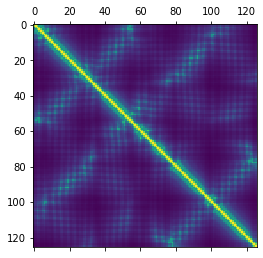

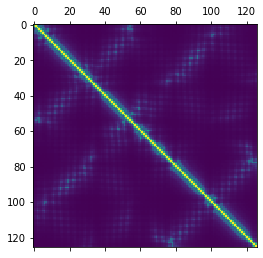

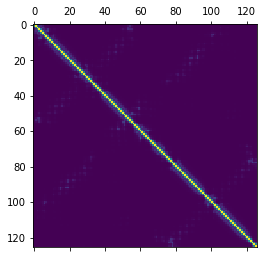

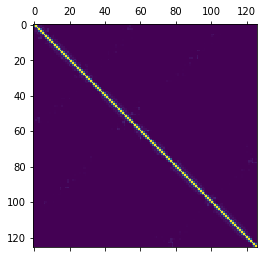

d2dj0a1


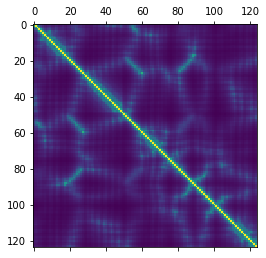

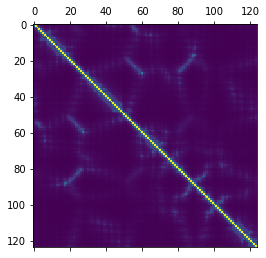

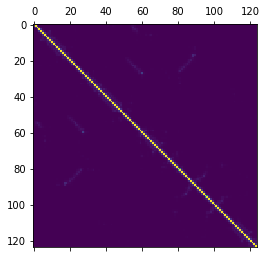

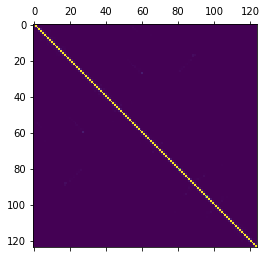

d1nkpa1


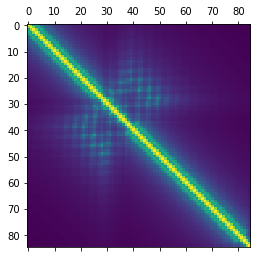

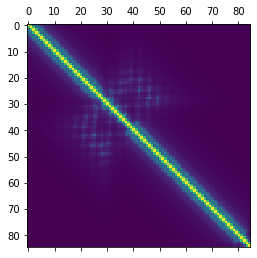

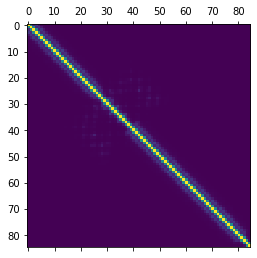

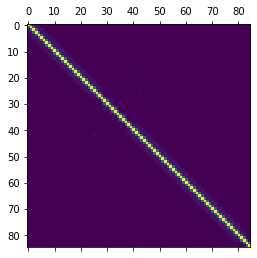

d3s9ka1


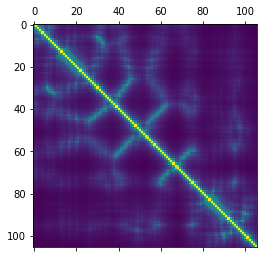

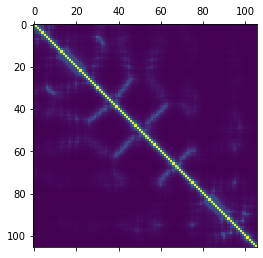

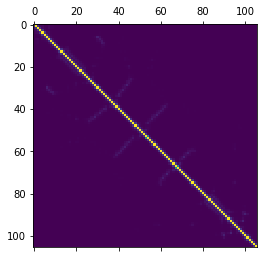

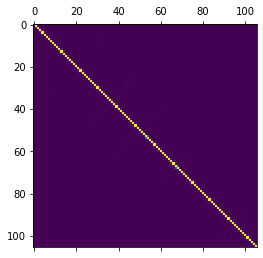

d1sdsa_


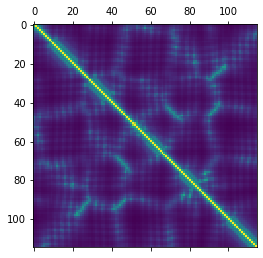

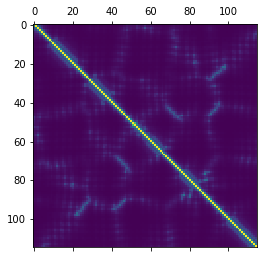

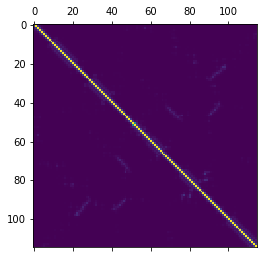

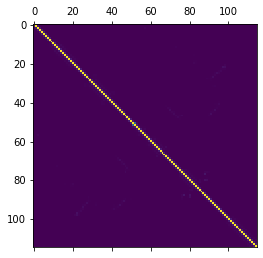

d4dvqa_


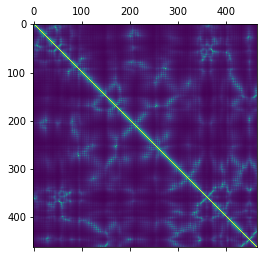

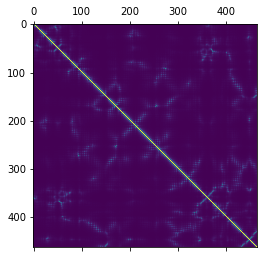

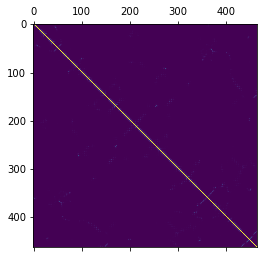

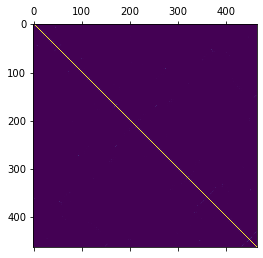

d1rdua_


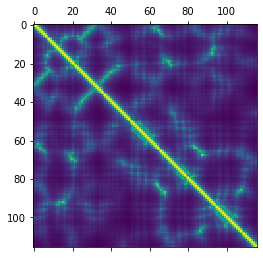

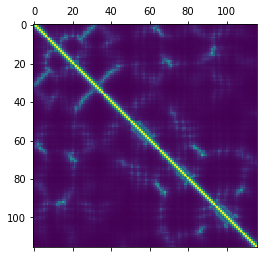

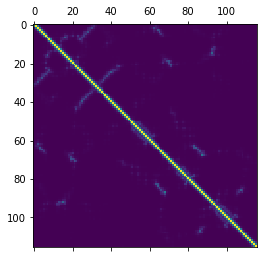

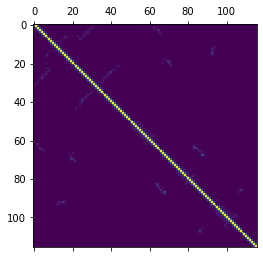

d3ezqa1


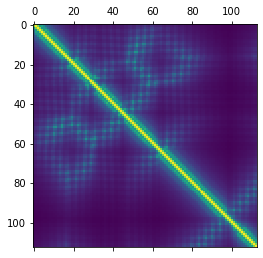

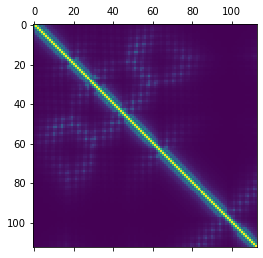

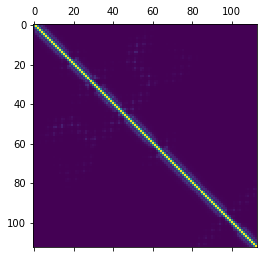

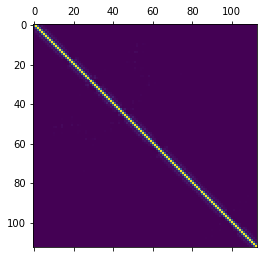

d2doaa1


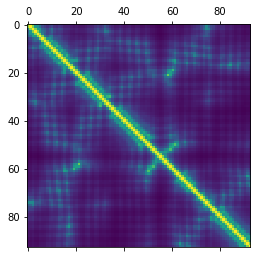

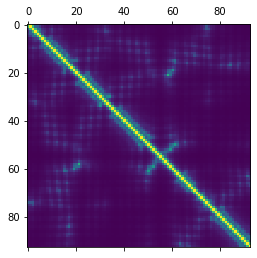

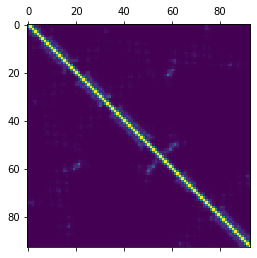

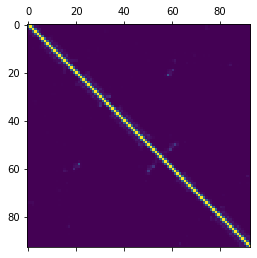

d4wu0a_


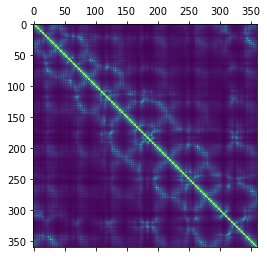

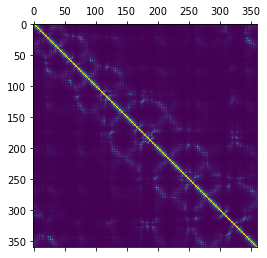

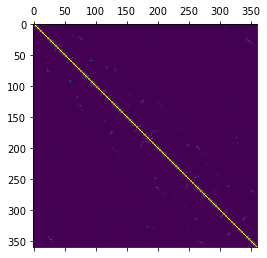

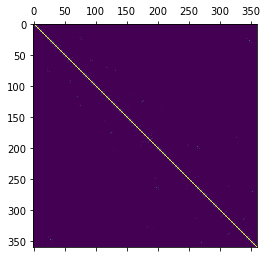

d1t0ha_


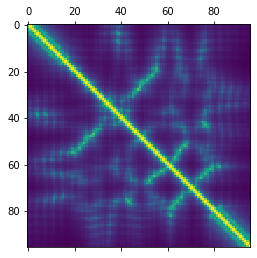

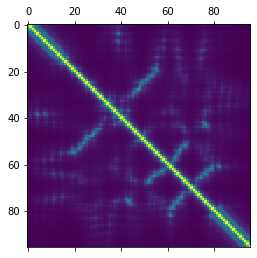

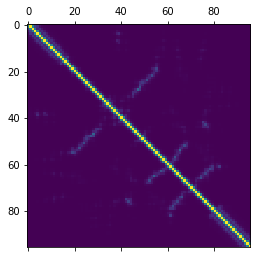

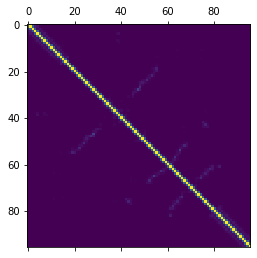

d1y0jb2


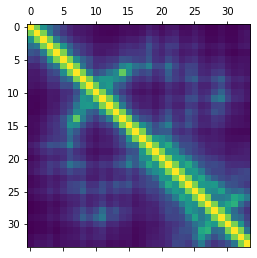

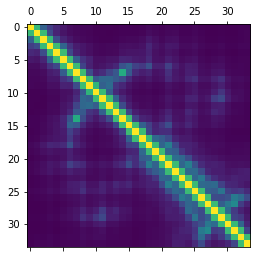

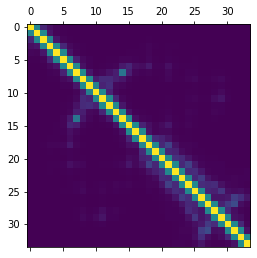

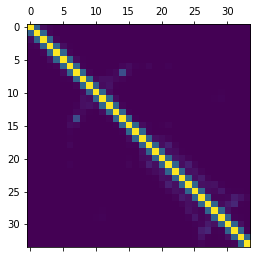

d2d8xa2


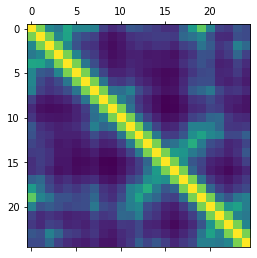

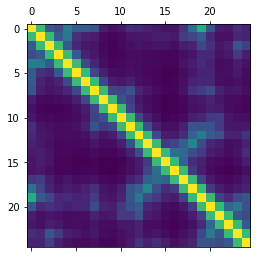

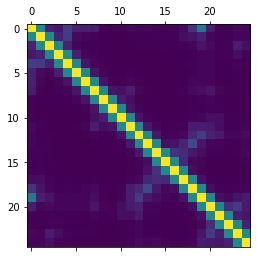

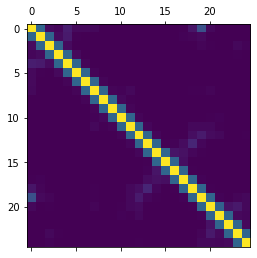

d2cqma1


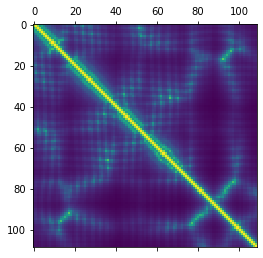

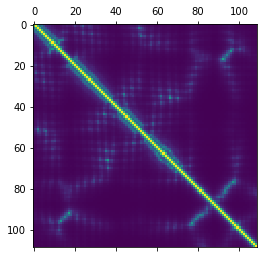

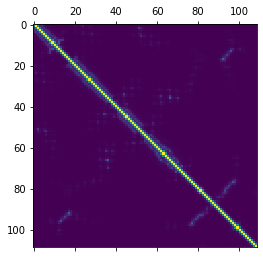

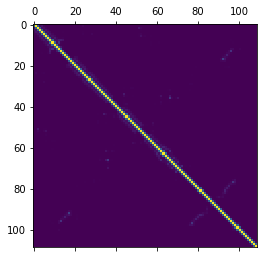

d2c6qa1


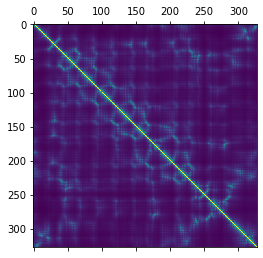

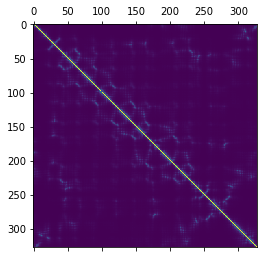

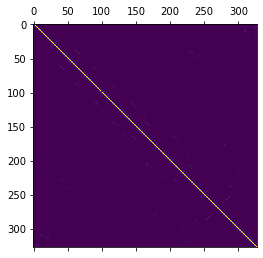

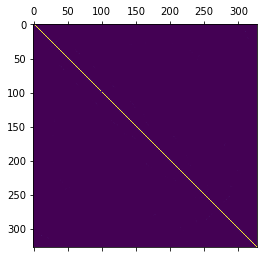

d4fkea3


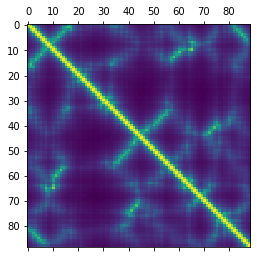

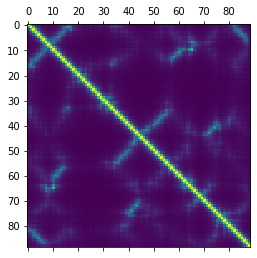

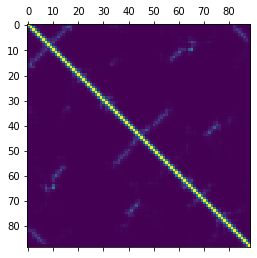

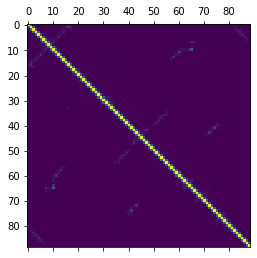

d2anra2


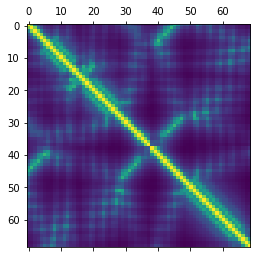

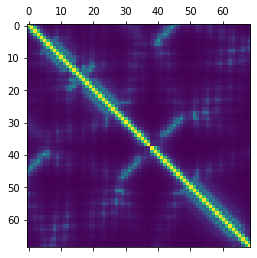

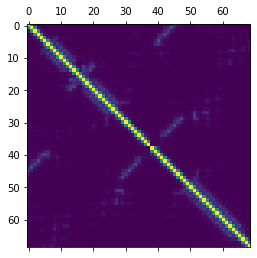

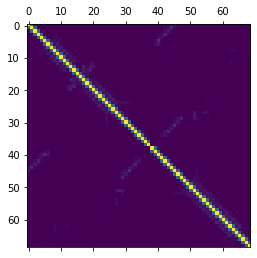

d1z54a1


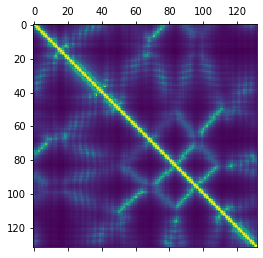

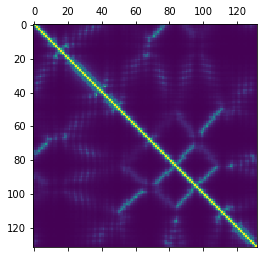

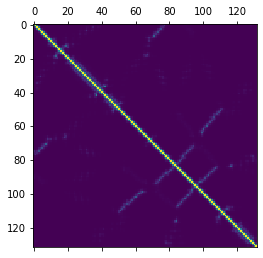

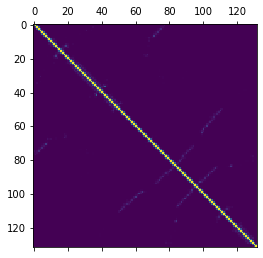

d5ay7a_


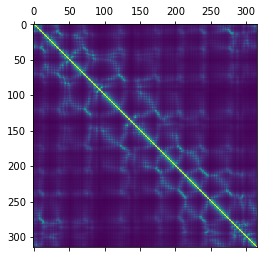

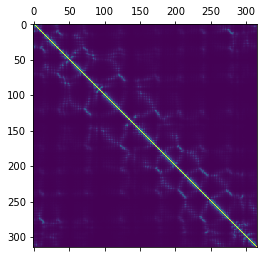

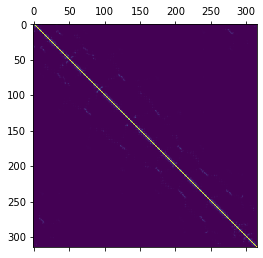

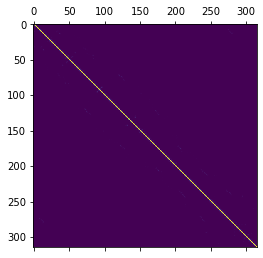

d1h4ra2


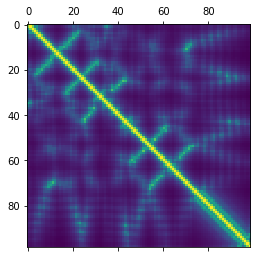

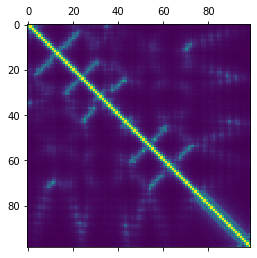

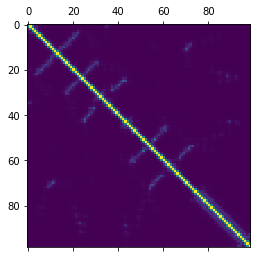

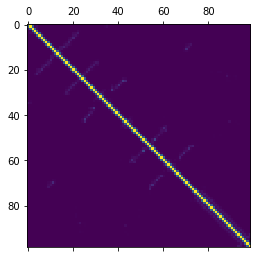

d1u5ea1


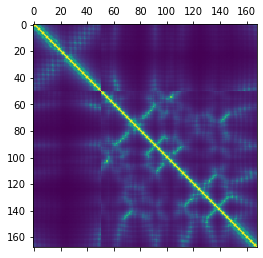

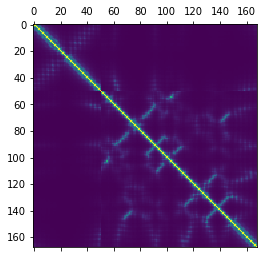

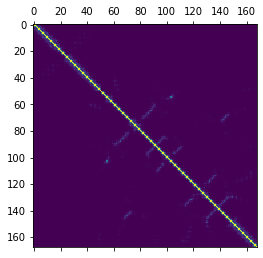

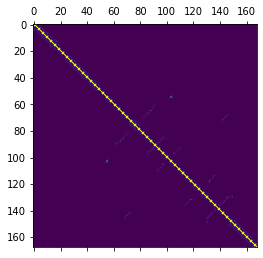

d1wwca_


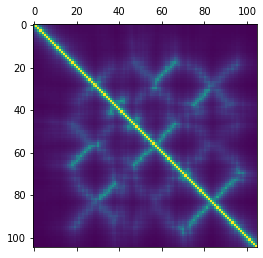

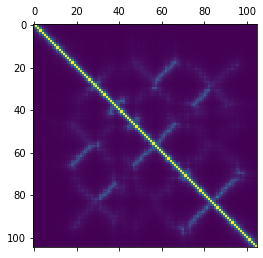

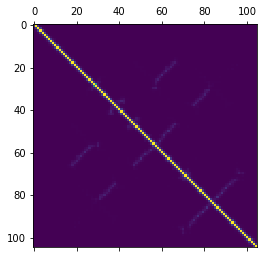

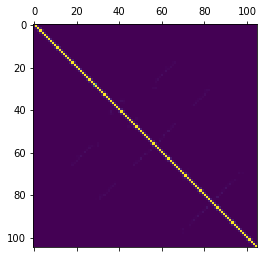

d1vf8a1


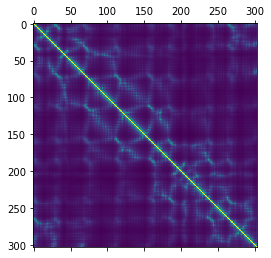

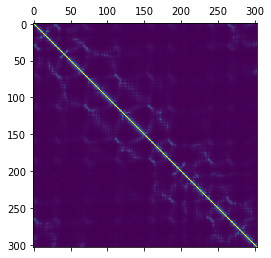

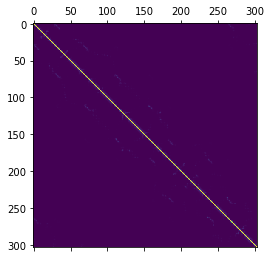

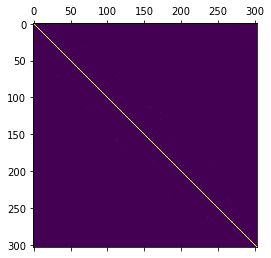

d3pxla1


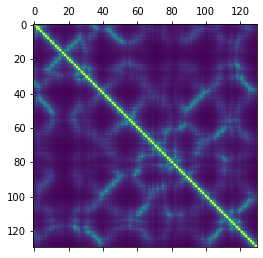

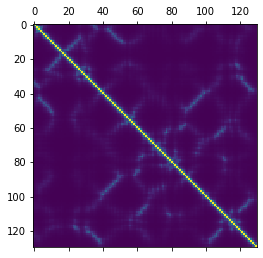

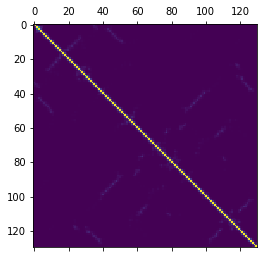

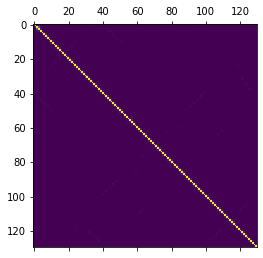

d2biba1


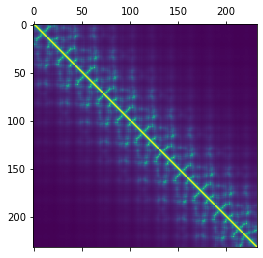

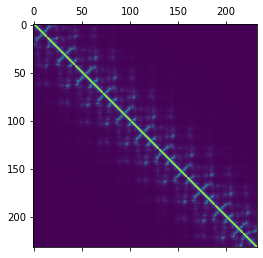

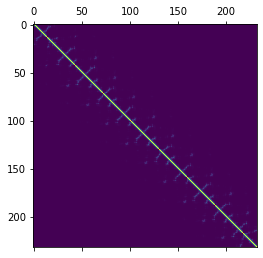

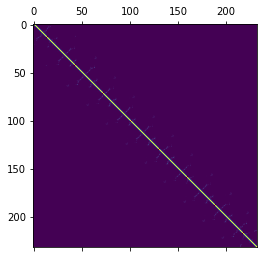

d4inca_


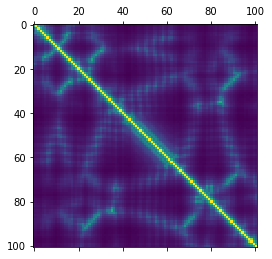

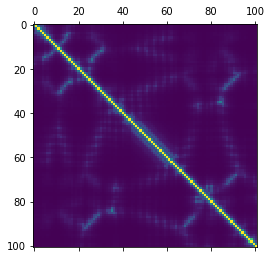

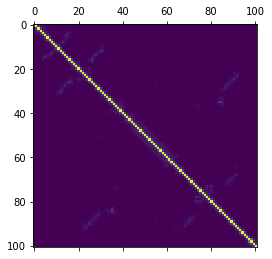

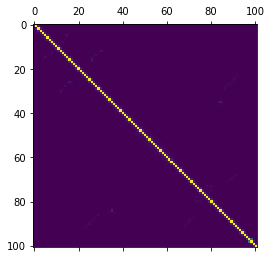

d3zeua1


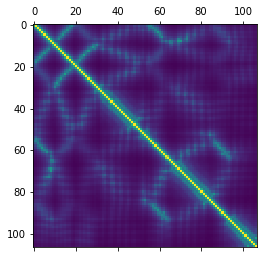

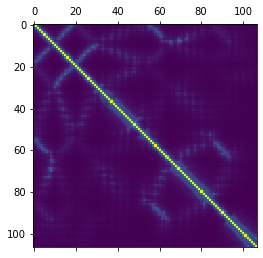

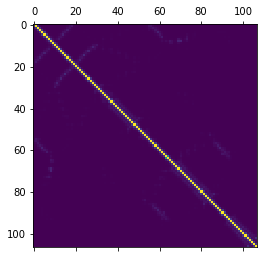

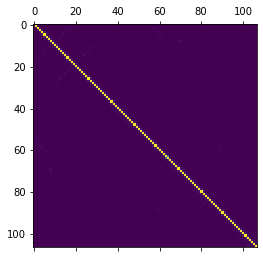

d4cg1a1


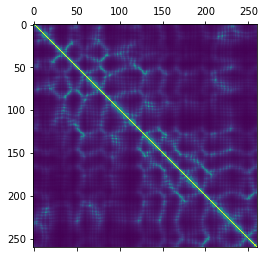

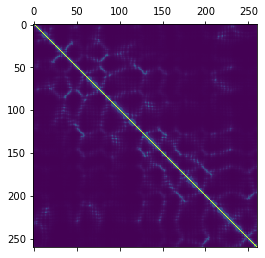

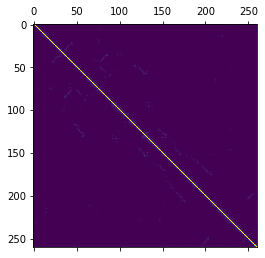

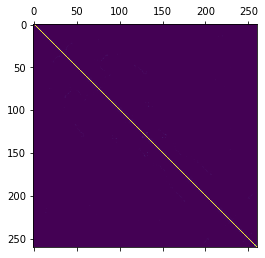

d1j5ja_


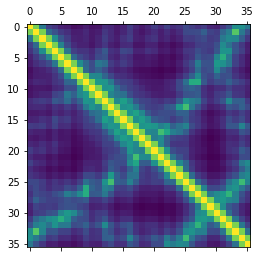

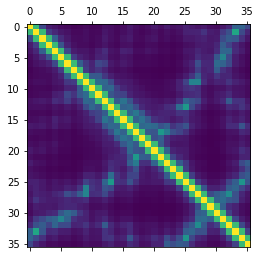

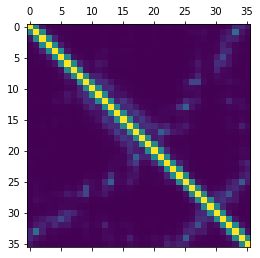

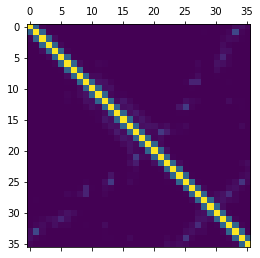

d2fvka2


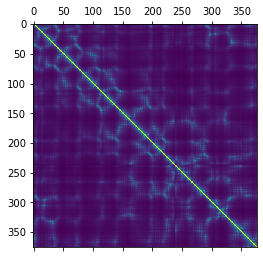

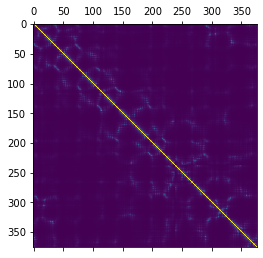

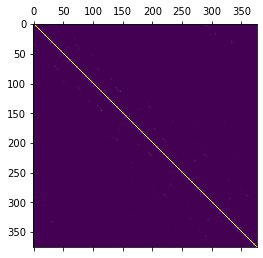

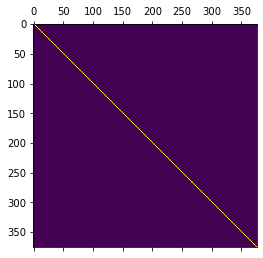

d1wb9a1


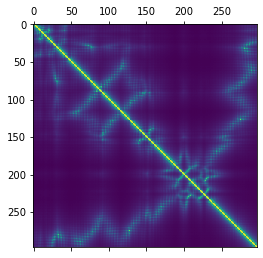

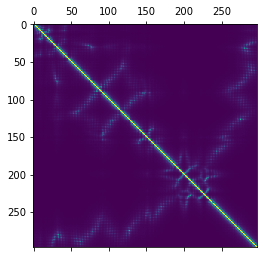

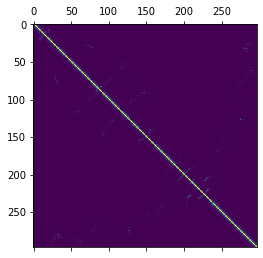

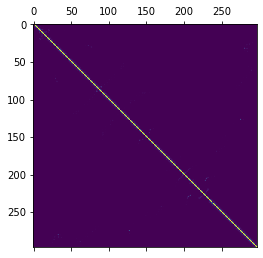

d5h20a_


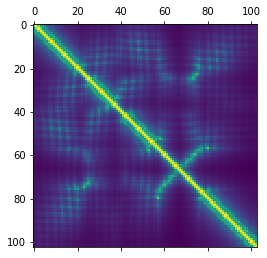

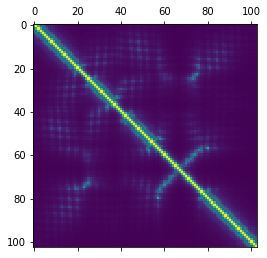

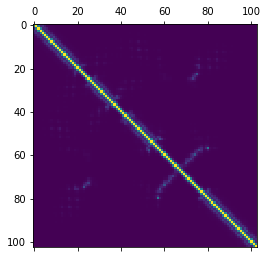

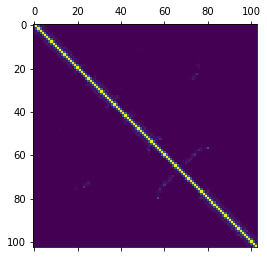

d1ijta_


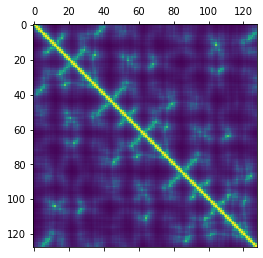

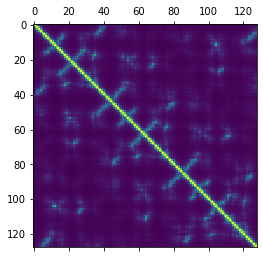

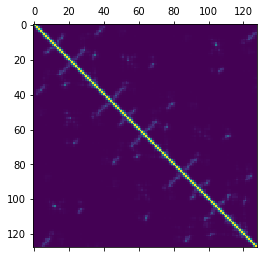

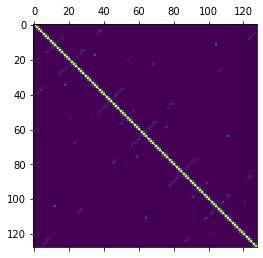

d2en2a1


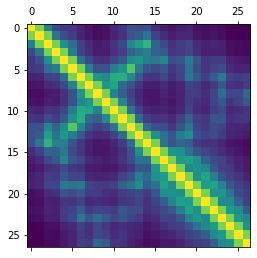

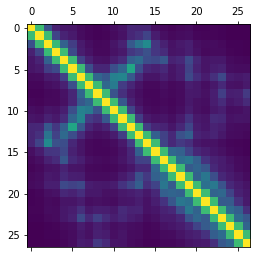

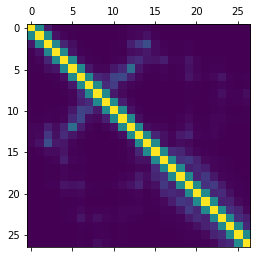

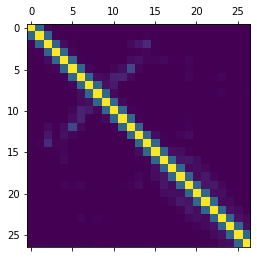

d1x49a1


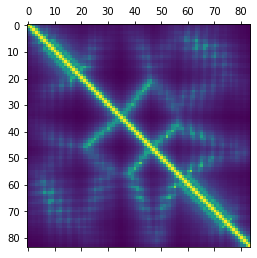

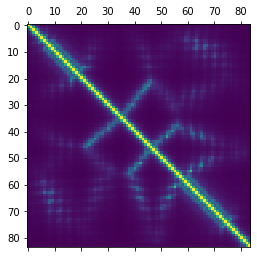

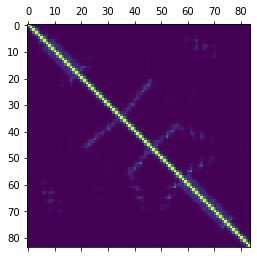

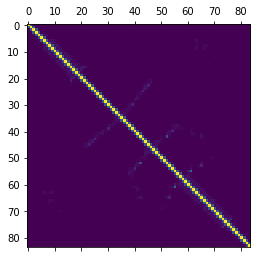

d3aowa_


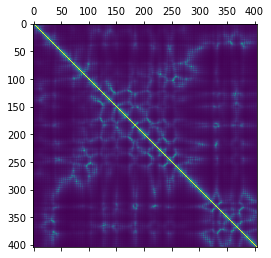

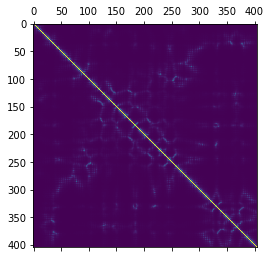

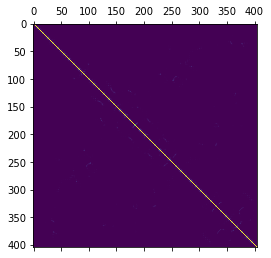

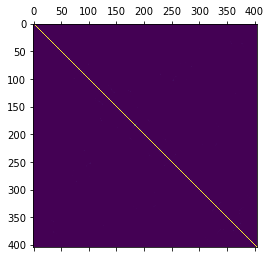

d3dgba1


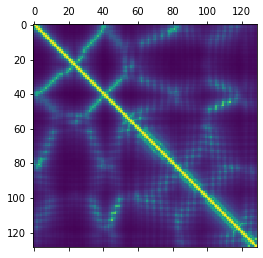

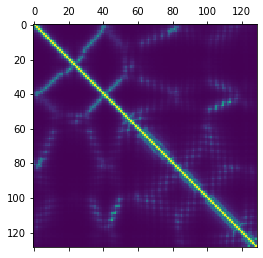

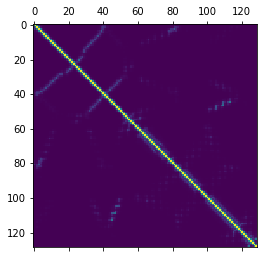

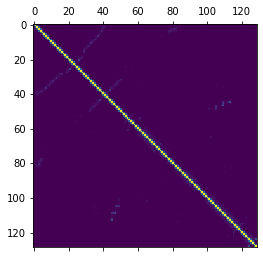

d1jaka2


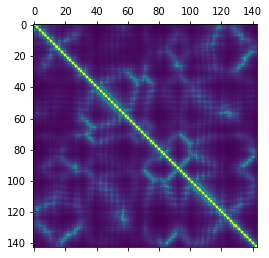

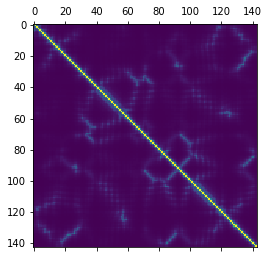

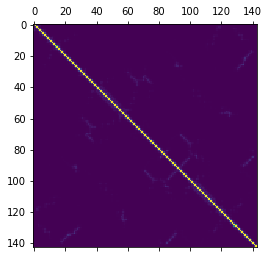

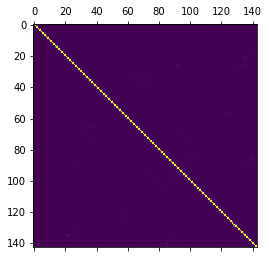

d4bkpa1


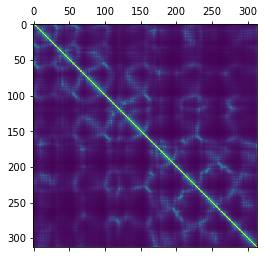

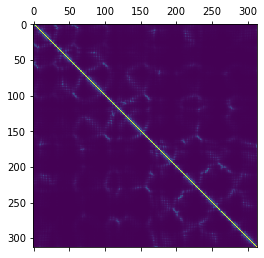

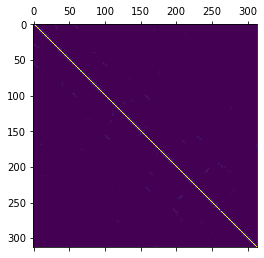

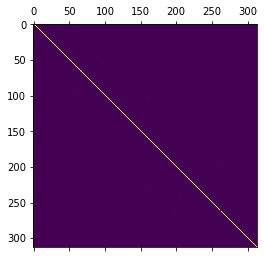

d2rdga2


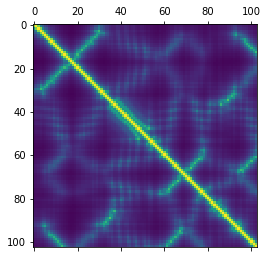

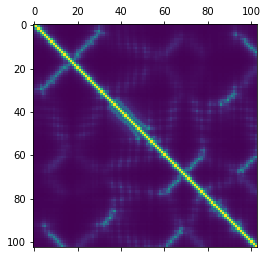

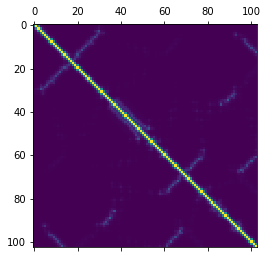

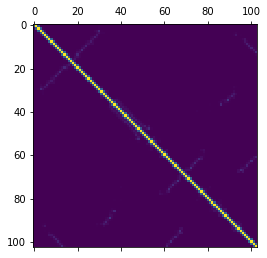

In [8]:
# 距离矩阵可视化
import numpy as np
import matplotlib.pyplot as plt

theSelecTrainList = np.load("/home/wngys/lab/DeepFold/pair/train.npy", allow_pickle=True)

cnt = 0
for id in theSelecTrainList:
    cnt += 1
    if cnt>50:
        break
    print(id)
    path = "/home/wngys/lab/DeepFold/distance_matrix_r/distance_matrix_mine_r/" + id + ".npy"
    mat = np.load(path, allow_pickle=True)
    plt.matshow(mat)
    plt.show()
    path = "/home/wngys/lab/DeepFold/distance_matrix_r/distance_matrix_mine_r_3/" + id + ".npy"
    mat = np.load(path, allow_pickle=True)[0]
    plt.matshow(mat)
    plt.show()
    mat = np.load(path, allow_pickle=True)[1]
    plt.matshow(mat)
    plt.show()
    mat = np.load(path, allow_pickle=True)[2]
    plt.matshow(mat)
    plt.show()

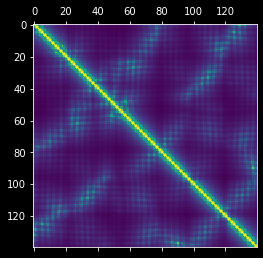

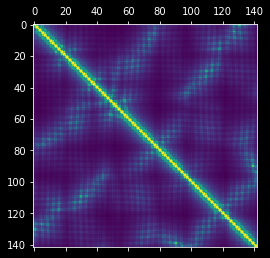

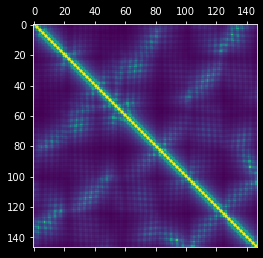

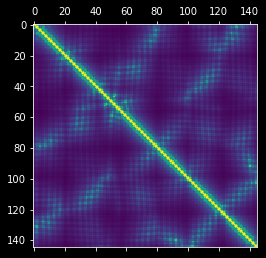

In [9]:
# 距离矩阵可视化
import numpy as np
import matplotlib.pyplot as plt

# showIDList = ['d3qu5a_','d2zs0a_','d1qqra_','d1gaka_','d1i5na_','d1r5la1','d5i8da3','d1j09a2']
showIDList = ['d2zs0a_','d2zs0b_','d2zs0c_','d2zs0d_']

for id in showIDList:
    path = "/home/wngys/lab/DeepFold/distance_matrix_r/distance_matrix_mine_r/" + id + ".npy"
    mat = np.load(path, allow_pickle=True)
    plt.matshow(mat)